<a href="https://colab.research.google.com/github/LaZzyMan/Notebook/blob/master/embedding_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import tensorflow as tf
from tensorboard.plugins import projector
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = 'SimHei'
sns.set(style='darkgrid')
sns.set_context('talk')

In [ ]:
with open('/content/drive/My Drive/Data/deep_walk_embedding_undirected.pickle', 'rb') as f:
  dp_embedding = pickle.load(f)
  f.close()
dp_model = Word2Vec.load('/content/drive/My Drive/Data/deep_walk_undirected.model')
dp_eva = pickle.load(open('/content/drive/My Drive/Data/deep_walk_eva.pickle', 'rb'))
with open('/content/drive/My Drive/Data/label_100.pickle', 'rb') as f:
  label = pickle.load(f)
  f.close()

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


R: degree>200; G: degree>80; U: degree>50; else: degree>100;

In [ ]:
land_use = pd.read_csv('/content/drive/My Drive/Data/land_use_100.csv')
land_use

,Unnamed: 0,count,land_use_code,land_use
0,0,174,M,工业用地
1,1,106,U,市政公用设施用地
2,2,506,R,居住用地
3,3,112,G,绿地与广场
4,4,397,C,商业服务业用地
5,5,229,P,公共管理与服务用地


# Deep Walk

In [ ]:
tsne = TSNE(n_components=2,init='pca',verbose=1)
nodes = list(dp_model.wv.vocab)
dp_embedding_tsne = tsne.fit_transform(dp_model[nodes])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1524 samples in 0.012s...
[t-SNE] Computed neighbors for 1524 samples in 0.576s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1524
[t-SNE] Computed conditional probabilities for sample 1524 / 1524
[t-SNE] Mean sigma: 0.475307
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.228180
[t-SNE] KL divergence after 1000 iterations: 1.271633


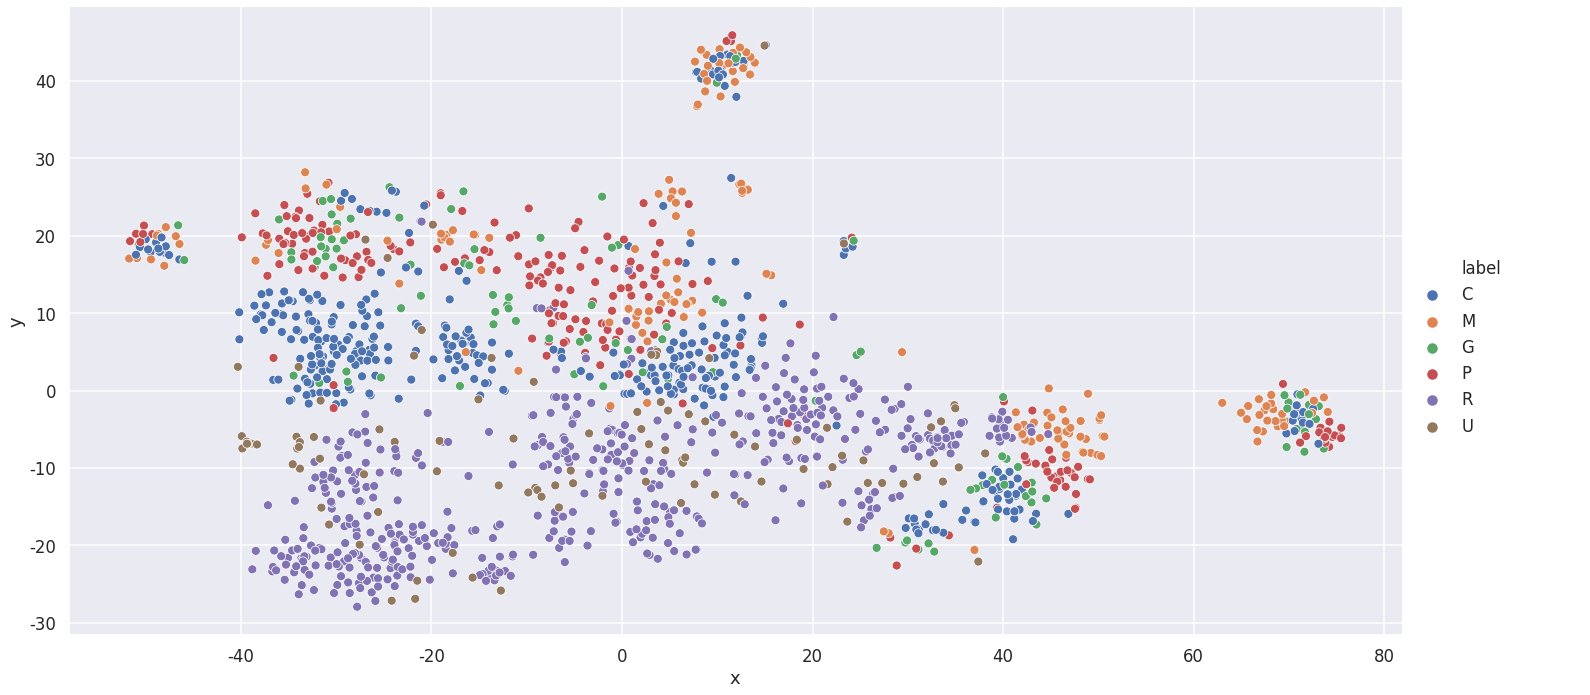

In [ ]:
dp_result = pd.DataFrame(dict(node=nodes, x=dp_embedding_tsne[:, 0], y=dp_embedding_tsne[:, 1], label=[label[node] for node in nodes]))
sns.relplot(x='x', y='y', hue='label', data=dp_result, height=10, aspect=2)

In [ ]:
dp_eva['overall']

,train_percent,micro-f1,macro-f1,acc
0,10%,0.730321,0.599348,0.730321
1,20%,0.768033,0.655879,0.768033
2,50%,0.772966,0.707014,0.772966
3,80%,0.832787,0.764120,0.832787


In [ ]:
dp_eva['single']['50%']

,C,G,M,P,R,U,accuracy,macro avg,weighted avg
precision,0.845304,0.484375,0.660000,0.709924,0.922414,0.592593,0.772966,0.702435,0.779308
recall,0.869318,0.500000,0.814815,0.699248,0.845850,0.561404,0.772966,0.715106,0.772966
f1-score,0.857143,0.492063,0.729282,0.704545,0.882474,0.576577,0.772966,0.707014,0.774636
support,176.000000,62.000000,81.000000,133.000000,253.000000,57.000000,0.772966,762.000000,762.000000


Text(19.5, 0.5, 'TRUE')

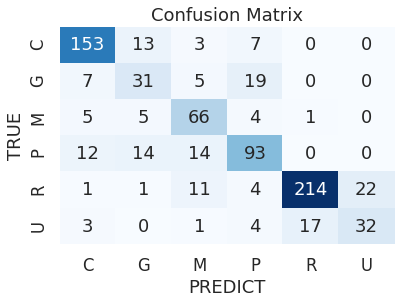

In [ ]:
cm = dp_eva['cm']['50%']
classes = ['C', 'G', 'M', 'P', 'R', 'U']
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes, fmt='.20g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('PREDICT')
ax.set_ylabel('TRUE') 

# Node2Vec


In [ ]:
with open('/content/drive/My Drive/Data/node2vec_embedding_undirected.pickle', 'rb') as f:
  n2v_embedding = pickle.load(f)
  f.close()
n2v_model = Word2Vec.load('/content/drive/My Drive/Data/node2vec_undirected.model')
n2v_eva = pd.read_csv('/content/drive/My Drive/Data/node2vec_undirected.csv')

In [ ]:
tsne = TSNE(n_components=2,init='pca',verbose=1)
nodes = list(n2v_model.wv.vocab)
n2v_embedding_tsne = tsne.fit_transform(n2v_model[nodes])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 953 samples in 0.011s...
[t-SNE] Computed neighbors for 953 samples in 0.260s...
[t-SNE] Computed conditional probabilities for sample 953 / 953
[t-SNE] Mean sigma: 0.559691
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.227417
[t-SNE] KL divergence after 1000 iterations: 0.713851


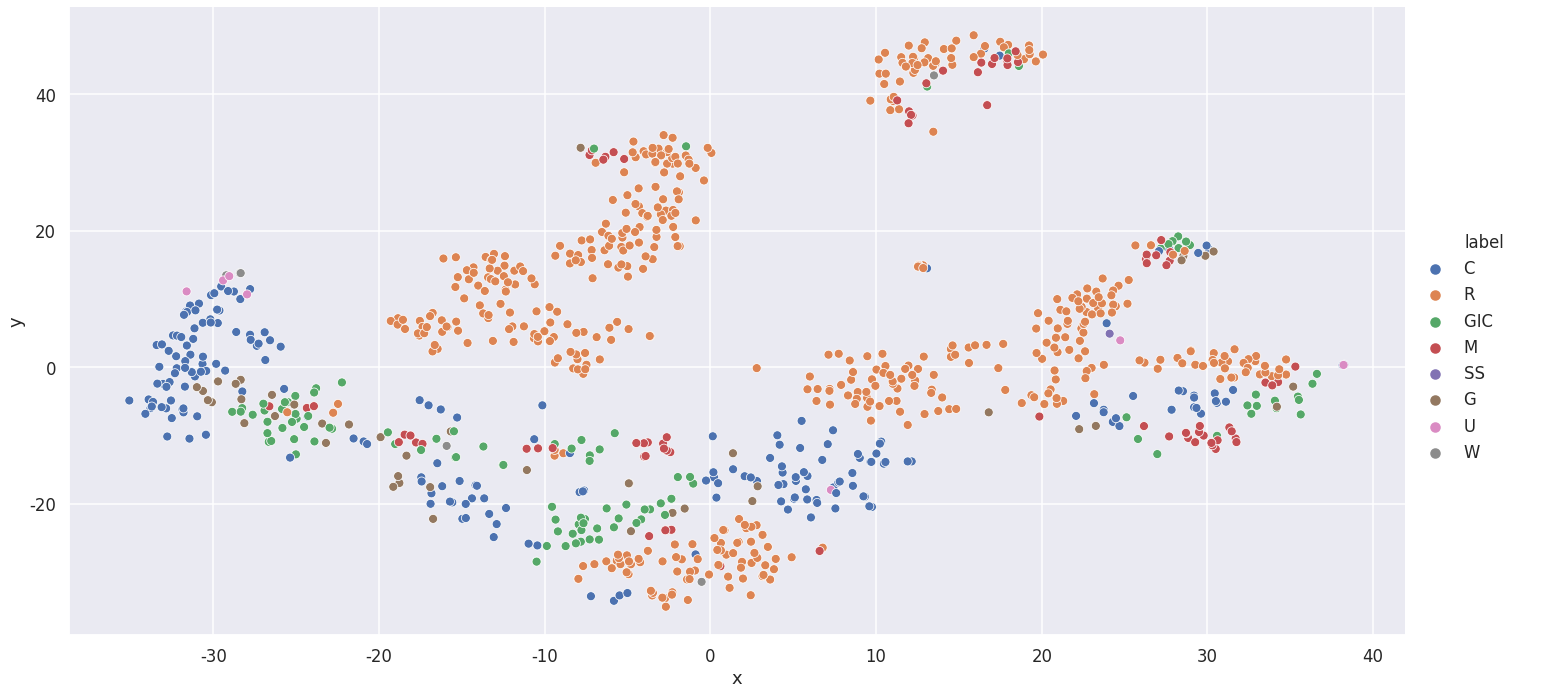

In [ ]:
n2v_result = pd.DataFrame(dict(node=nodes, x=n2v_embedding_tsne[:, 0], y=n2v_embedding_tsne[:, 1], label=[label[node] for node in nodes]))
sns.relplot(x='x', y='y', hue='label', data=n2v_result, height=10, aspect=2)

In [ ]:
n2v_eva

,Unnamed: 0,train_percent,micro-f1,macro-f1,acc
0,0,10%,0.785613,0.406747,0.755245
1,1,20%,0.847171,0.475291,0.828309
2,2,50%,0.870588,0.499598,0.859539
3,3,80%,0.886076,0.514884,0.874346


# Struc2Vec

In [ ]:
with open('/content/drive/My Drive/Data/struc2vec_embedding_undirected.pickle', 'rb') as f:
  s2v_embedding = pickle.load(f)
  f.close()
s2v_model = Word2Vec.load('/content/drive/My Drive/Data/struc2vec_undirected.model')
s2v_eva = pickle.load(open('/content/drive/My Drive/Data/struc2vec_eva.pickle', 'rb'))

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
tsne = TSNE(n_components=2,init='pca',verbose=1)
nodes = list(s2v_model.wv.vocab)
s2v_embedding_tsne = tsne.fit_transform(s2v_model[nodes])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1524 samples in 0.016s...
[t-SNE] Computed neighbors for 1524 samples in 0.669s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1524
[t-SNE] Computed conditional probabilities for sample 1524 / 1524
[t-SNE] Mean sigma: 2.043699
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.986385
[t-SNE] KL divergence after 1000 iterations: 0.231728


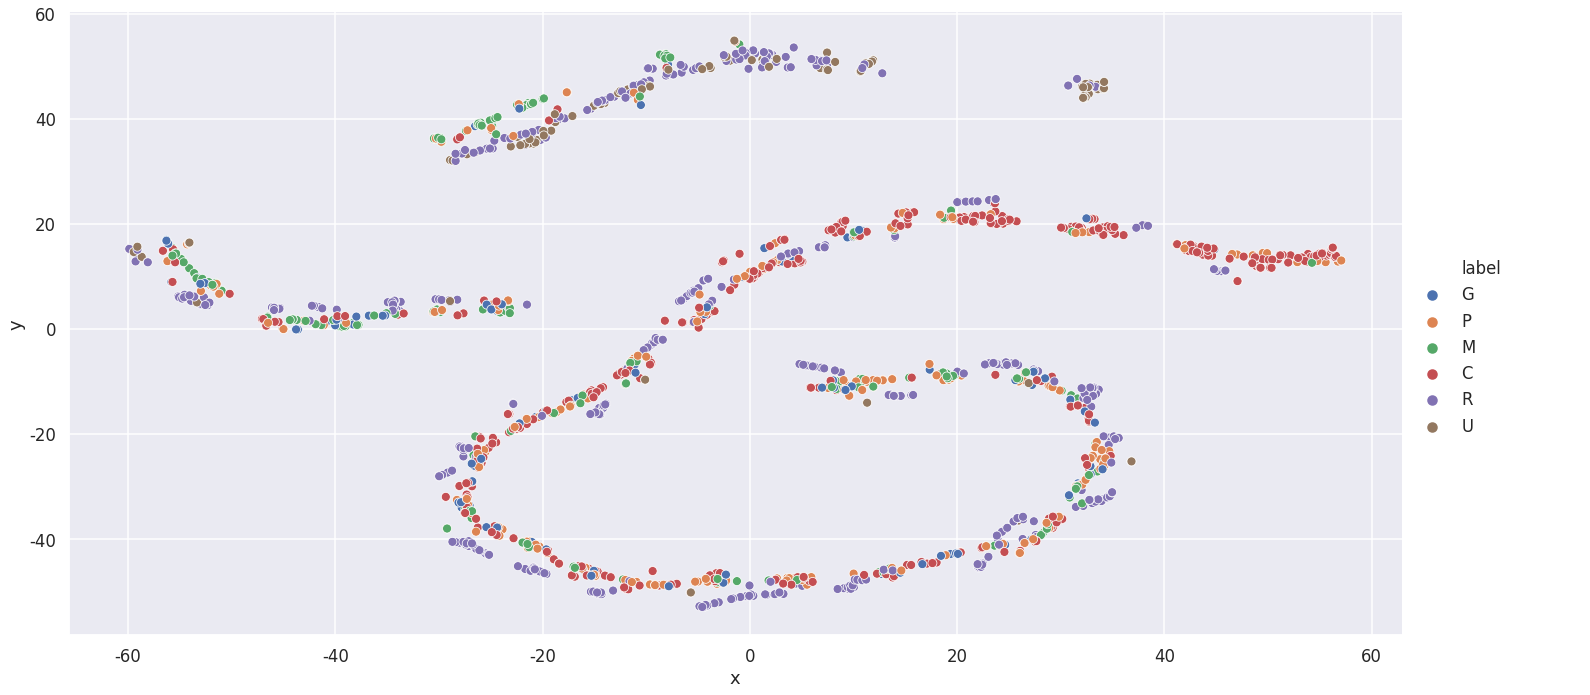

In [ ]:
s2v_result = pd.DataFrame(dict(node=nodes, x=s2v_embedding_tsne[:, 0], y=s2v_embedding_tsne[:, 1], label=[label[node] for node in nodes]))
sns.relplot(x='x', y='y', hue='label', data=s2v_result, height=10, aspect=2)

In [ ]:
s2v_eva['overall']

,train_percent,micro-f1,macro-f1,acc
0,10%,0.440233,0.329581,0.440233
1,20%,0.497541,0.410040,0.497541
2,50%,0.564304,0.480869,0.564304
3,80%,0.563934,0.445138,0.563934


In [ ]:
s2v_eva['single']['50%']

,C,G,M,P,R,U,accuracy,macro avg,weighted avg
precision,0.637306,0.220779,0.400000,0.295918,0.831169,0.460317,0.564304,0.474248,0.579506
recall,0.605911,0.303571,0.481928,0.245763,0.768000,0.557692,0.564304,0.493811,0.564304
f1-score,0.621212,0.255639,0.437158,0.268519,0.798337,0.504348,0.564304,0.480869,0.569818
support,203.000000,56.000000,83.000000,118.000000,250.000000,52.000000,0.564304,762.000000,762.000000


Text(19.5, 0.5, 'TRUE')

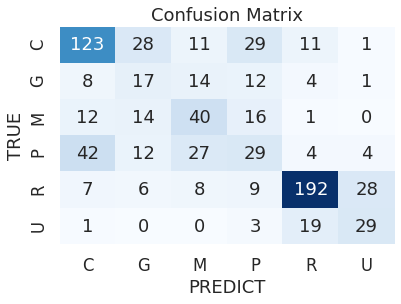

In [ ]:
cm = s2v_eva['cm']['50%']
classes = ['C', 'G', 'M', 'P', 'R', 'U']
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes, fmt='.20g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('PREDICT')
ax.set_ylabel('TRUE') 

# LINE

In [ ]:
with open('/content/drive/My Drive/Data/line_embedding_undirected.pickle', 'rb') as f:
  line_embedding = pickle.load(f)
  f.close()
line_eva = pickle.load(open('/content/drive/My Drive/Data/line_eva.pickle', 'rb'))

In [ ]:
tsne = TSNE(n_components=2,init='pca',verbose=1)
nodes = []
embeddings = []
for node, embedding in line_embedding.items():
  nodes.append(node)
  embeddings.append(embedding)
embeddings = np.array(embeddings)
line_embedding_tsne = tsne.fit_transform(embeddings)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1524 samples in 0.031s...
[t-SNE] Computed neighbors for 1524 samples in 0.941s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1524
[t-SNE] Computed conditional probabilities for sample 1524 / 1524
[t-SNE] Mean sigma: 1.660152
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.886848
[t-SNE] KL divergence after 1000 iterations: 0.942709


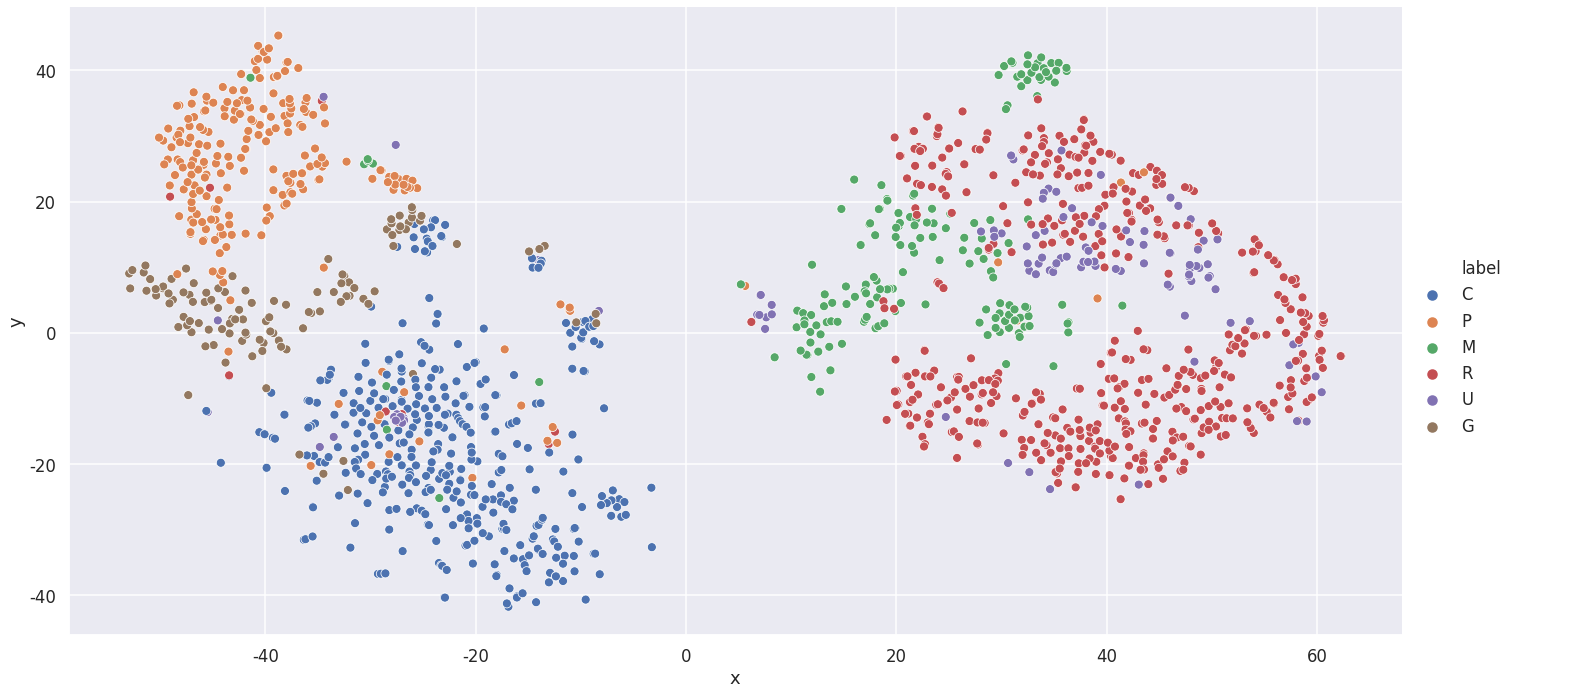

In [ ]:
line_result = pd.DataFrame(dict(node=nodes, x=line_embedding_tsne[:, 0], y=line_embedding_tsne[:, 1], label=[label[node] for node in nodes]))
sns.relplot(x='x', y='y', hue='label', data=line_result, height=10, aspect=2)

In [ ]:
line_eva['overall']

,train_percent,micro-f1,macro-f1,acc
0,10%,0.852041,0.785124,0.852041
1,20%,0.864754,0.812688,0.864754
2,50%,0.866142,0.825369,0.866142
3,80%,0.881967,0.846312,0.881967


In [ ]:
line_eva['single']['50%']

,C,G,M,P,R,U,accuracy,macro avg,weighted avg
precision,0.907317,0.761905,0.846939,0.88785,0.911017,0.622642,0.866142,0.822945,0.864721
recall,0.948980,0.813559,0.943182,0.87156,0.863454,0.540984,0.866142,0.830286,0.866142
f1-score,0.927681,0.786885,0.892473,0.87963,0.886598,0.578947,0.866142,0.825369,0.864498
support,196.000000,59.000000,88.000000,109.00000,249.000000,61.000000,0.866142,762.000000,762.000000


Text(19.5, 0.5, 'TRUE')

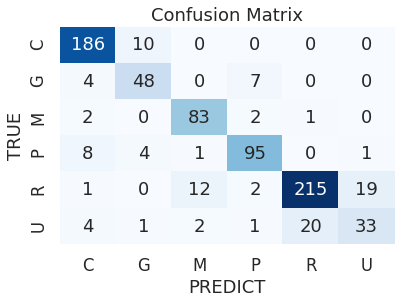

In [ ]:
cm = line_eva['cm']['50%']
classes = ['C', 'G', 'M', 'P', 'R', 'U']
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes, fmt='.20g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('PREDICT')
ax.set_ylabel('TRUE') 

# SDNE

In [ ]:
with open('/content/drive/My Drive/Data/sdne_embedding_undirected.pickle', 'rb') as f:
  sdne_embedding = pickle.load(f)
  f.close()
sdne_eva = pd.read_csv('/content/drive/My Drive/Data/sdne_undirected.csv')

In [ ]:
tsne = TSNE(n_components=2,init='pca',verbose=1)
nodes = []
embeddings = []
for node, embedding in sdne_embedding.items():
  nodes.append(node)
  embeddings.append(embedding)
embeddings = np.array(embeddings)
sdne_embedding_tsne = tsne.fit_transform(embeddings)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 953 samples in 0.014s...
[t-SNE] Computed neighbors for 953 samples in 0.163s...
[t-SNE] Computed conditional probabilities for sample 953 / 953
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.937904
[t-SNE] KL divergence after 1000 iterations: 0.100838


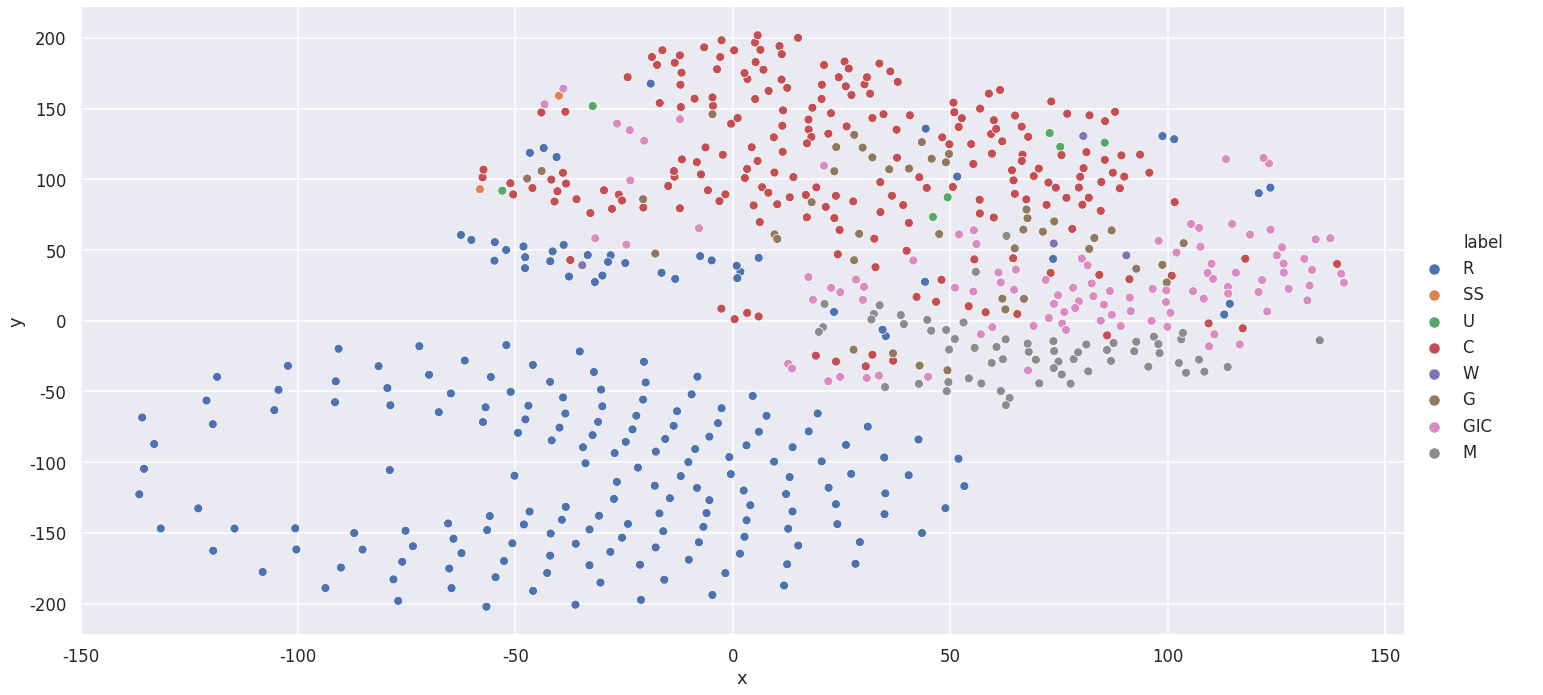

In [ ]:
sdne_result = pd.DataFrame(dict(node=nodes, x=sdne_embedding_tsne[:, 0], y=sdne_embedding_tsne[:, 1], label=[label[node] for node in nodes]))
sns.relplot(x='x', y='y', hue='label', data=sdne_result, height=10, aspect=2)

In [ ]:
sdne_eva

,Unnamed: 0,train_percent,micro-f1,macro-f1,acc
0,0,10%,0.679555,0.295090,0.614219
1,1,20%,0.726685,0.321301,0.668414
2,2,50%,0.731624,0.341153,0.670860
3,3,80%,0.724280,0.350543,0.649215


# SDNE Keras

In [ ]:
with open('/content/drive/My Drive/Data/sdne_keras_embedding.pickle', 'rb') as f:
  sdne_keras_embedding = pickle.load(f)
  f.close()
sdne_keras_eva = pickle.load(open('/content/drive/My Drive/Data/sdne_eva.pickle', 'rb'))

In [ ]:
tsne = TSNE(n_components=2,init='pca',verbose=1)
nodes = []
embeddings = []
for node, embedding in sdne_keras_embedding.items():
  nodes.append(node)
  embeddings.append(embedding)
embeddings = np.array(embeddings)
sdne_keras_embedding_tsne = tsne.fit_transform(embeddings)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1524 samples in 0.014s...
[t-SNE] Computed neighbors for 1524 samples in 0.143s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1524
[t-SNE] Computed conditional probabilities for sample 1524 / 1524
[t-SNE] Mean sigma: 0.049723
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.976288
[t-SNE] KL divergence after 1000 iterations: 0.433977


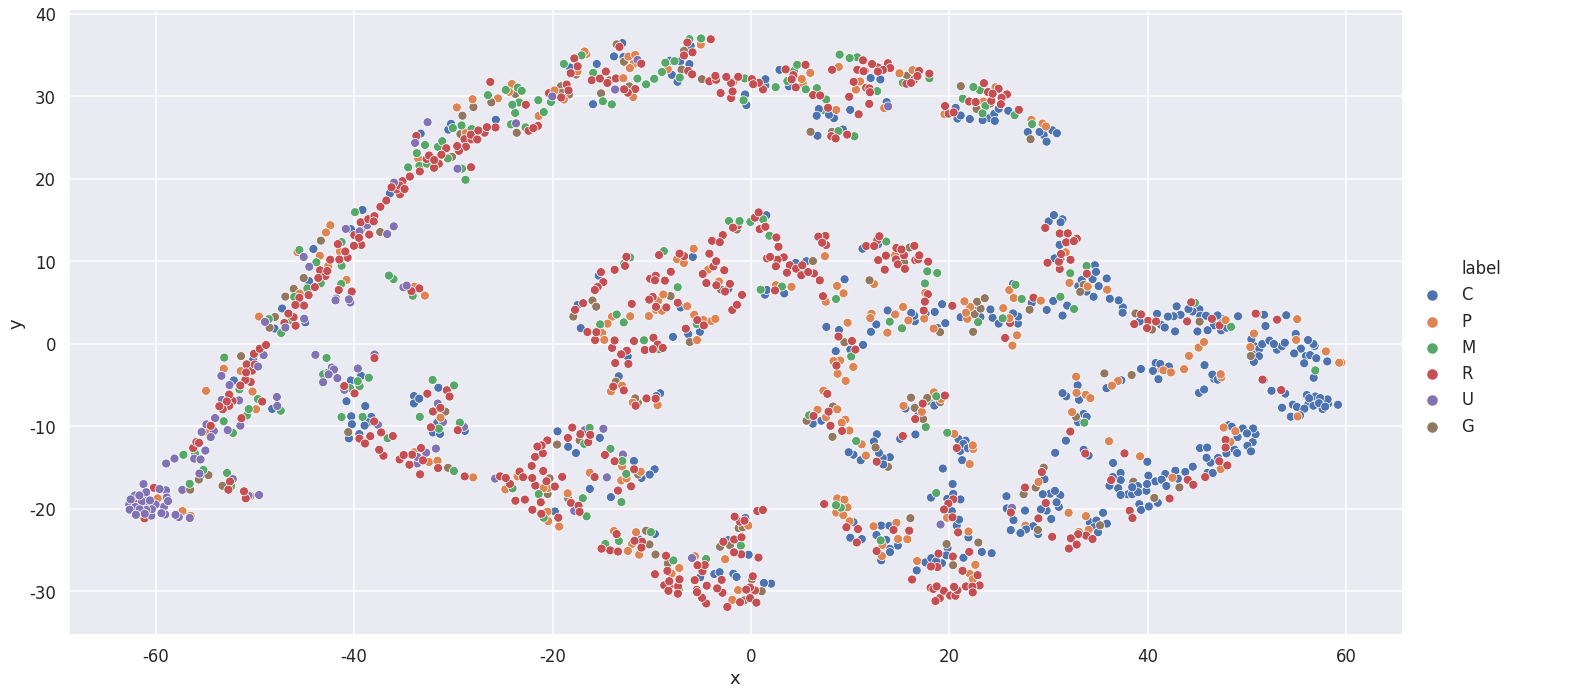

In [ ]:
sdne_keras_result = pd.DataFrame(dict(node=nodes, x=sdne_keras_embedding_tsne[:, 0], y=sdne_keras_embedding_tsne[:, 1], label=[label[node] for node in nodes]))
sns.relplot(x='x', y='y', hue='label', data=sdne_keras_result, height=10, aspect=2)

In [ ]:
sdne_keras_eva['overall']

,train_percent,micro-f1,macro-f1,acc
0,10%,0.317784,0.278185,0.317784
1,20%,0.313934,0.280052,0.313934
2,50%,0.307087,0.251553,0.307087
3,80%,0.295082,0.225284,0.295082


In [ ]:
sdne_keras_eva['single']['50%']

,C,G,M,P,R,U,accuracy,macro avg,weighted avg
precision,0.502283,0.087912,0.181818,0.181818,0.402985,0.204301,0.307087,0.260186,0.331399
recall,0.588235,0.125000,0.243902,0.034188,0.202247,0.844444,0.307087,0.339670,0.307087
f1-score,0.541872,0.103226,0.208333,0.057554,0.269327,0.329004,0.307087,0.251553,0.286705
support,187.000000,64.000000,82.000000,117.000000,267.000000,45.000000,0.307087,762.000000,762.000000


Text(19.5, 0.5, 'TRUE')

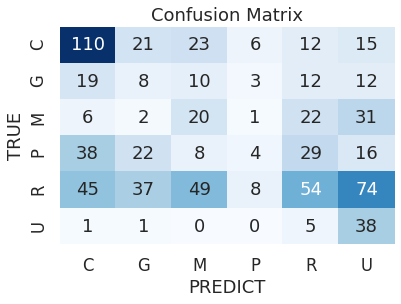

In [ ]:
cm = sdne_keras_eva['cm']['50%']
classes = ['C', 'G', 'M', 'P', 'R', 'U']
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes, fmt='.20g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('PREDICT')
ax.set_ylabel('TRUE') 

# Land Cover

In [ ]:
land_cover_eva = pickle.load(open('/content/drive/My Drive/Data/land_cover_eva.pickle', 'rb'))

In [ ]:
land_cover_eva['overall']

,train_percent,micro-f1,macro-f1,acc
0,10%,0.303207,0.212012,0.303207
1,20%,0.283607,0.218585,0.283607
2,50%,0.261155,0.202177,0.261155
3,80%,0.222951,0.191612,0.222951


In [ ]:
land_cover_eva['single']['50%']

,C,G,M,P,R,U,accuracy,macro avg,weighted avg
precision,0.317829,0.285714,0.166667,0.179104,0.477273,0.041322,0.261155,0.244652,0.311087
recall,0.624365,0.618182,0.042553,0.106195,0.083004,0.100000,0.261155,0.262383,0.261155
f1-score,0.421233,0.390805,0.067797,0.133333,0.141414,0.058480,0.261155,0.202177,0.216035
support,197.000000,55.000000,94.000000,113.000000,253.000000,50.000000,0.261155,762.000000,762.000000


Text(19.5, 0.5, 'TRUE')

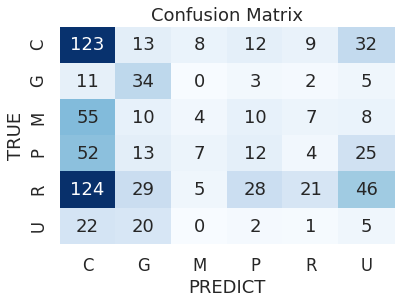

In [ ]:
cm = land_cover_eva['cm']['50%']
classes = ['C', 'G', 'M', 'P', 'R', 'U']
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes, fmt='.20g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('PREDICT')
ax.set_ylabel('TRUE') 